# Demonstration of `dead_leaves` usage

## Import

In [ ]:
from deadleaves import LeafGeometryGenerator, LeafAppearanceSampler, ImageRenderer, LeafTopology
import pandas as pd
import torch

import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

%reload_ext autoreload
%autoreload 2

## Shapes and Sizes

### Circles

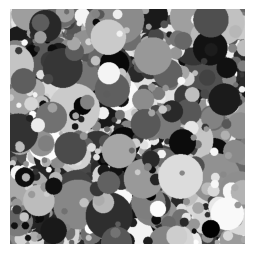

In [2]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/circles.png")

### Ellipsoids

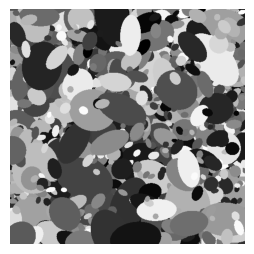

In [3]:
model = LeafGeometryGenerator(
    "ellipsoid", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "orientation": {"uniform": {"low": 0.0, "high": 2 * torch.pi}},
        "aspect_ratio": {"uniform": {"low": 0.5, "high": 2}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/ellipsoids.png")

### Rectangles

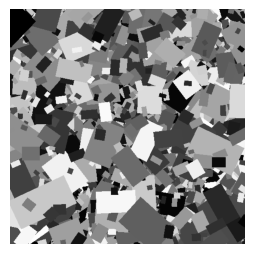

In [4]:
model = LeafGeometryGenerator(
    "rectangular", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "orientation": {"uniform": {"low": 0.0, "high": 2 * torch.pi}},
        "aspect_ratio": {"uniform": {"low": 0.5, "high": 2}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/rectangles.png")

### Regular Polygons

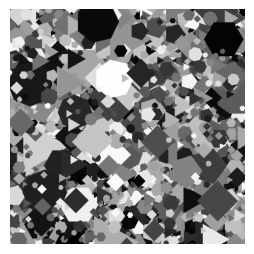

In [5]:
model = LeafGeometryGenerator(
    "polygon", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "n_vertices": {"poisson": {"rate": 5}},
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/polygons.png")

## Colors

### RGB

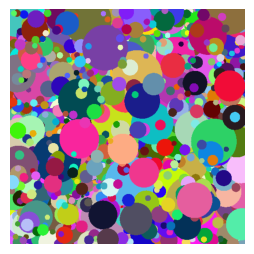

In [6]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "R": {"uniform": {"low": 0.0, "high": 1.0}},
        "G": {"uniform": {"low": 0.0, "high": 1.0}},
        "B": {"uniform": {"low": 0.0, "high": 1.0}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/RGB.png")

### HSV

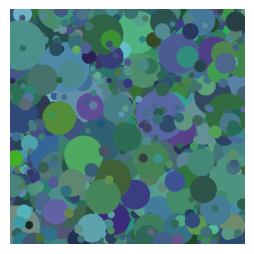

In [7]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "H": {"normal": {"loc": 0.5, "scale": 0.1}},
        "S": {"normal": {"loc": 0.5, "scale": 0.1}},
        "V": {"normal": {"loc": 0.5, "scale": 0.1}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/HSV.png")

### From Image

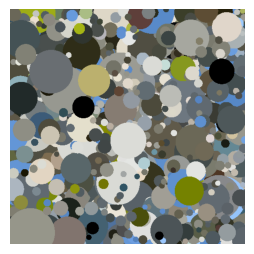

In [8]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"source": {"image": {"dir": "./images"}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/natural_color.png")

## Texture

### Leafwise noise

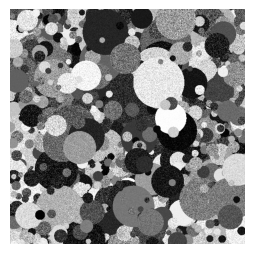

In [9]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})
colormodel.sample_texture({"gray": {"normal": {"loc": 0, "scale": {"uniform": {"low": 0.01, "high": 0.2}}}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/leafwise_texture.png")

### Texture patches

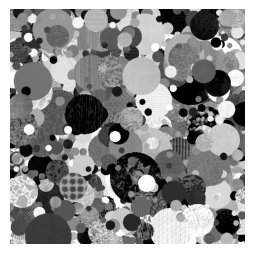

In [10]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.1, "high": 0.9}}})
colormodel.sample_texture(
    {
        "source": {"image": {"dir": "/home/swantje/datasets/brodatz"}},
        "alpha": {"normal": {"loc": 0.0, "scale": 0.5}},
    }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/texture_patch.png")

## Partial sampling

### Sparse sampling

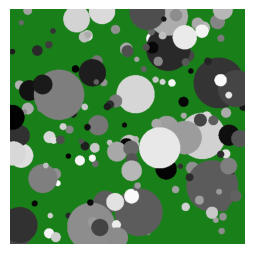

In [11]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512),
    n_sample = 150
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map, background_color=torch.tensor([0.1,0.5,0.1]))
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/sparse_sampling.png")

### Masking

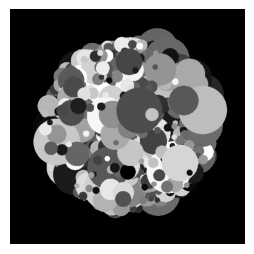

In [12]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}},
    (512,512),
    position_mask = {
        "shape": "circular",
        "params": {"area": 512*512*0.4}
    }
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/position_mask.png")

## Dependencies

### Single feature dependency

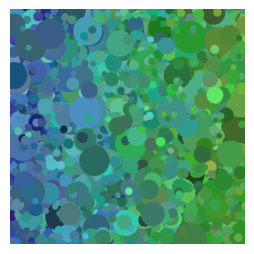

In [13]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 5000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "H": {"normal": {
            "loc": {"from": "x_pos", "fn": lambda x: 1/512*x * 0.3 + (1-1/512*x) * 0.6}, 
            "scale": 0.05
        }},
        "S": {"normal": {"loc": 0.6, "scale": 0.1}},
        "V": {"normal": {"loc": 0.6, "scale": 0.1}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/single_feature_dependency.png")

### Multi-Feature dependency

/home/swantje/dead_leaves/.venv/lib/python3.12/site-packages/torch/utils/_device.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


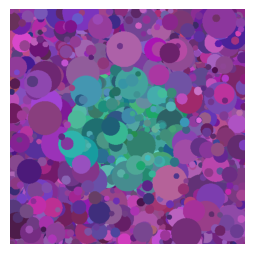

In [14]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"powerlaw": {"low": 100.0, "high": 5000.0, "k": 1.5}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

def fn(d):
    distance_from_center = torch.sqrt(torch.tensor((256 - d["x_pos"]) ** 2 + (256 - d["y_pos"]) ** 2))
    return torch.where(distance_from_center <= 128, 0.5, 0.8)

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "H": {"normal": {
            "loc": {"from": ["x_pos","y_pos"], "fn": fn}, 
            "scale": 0.05
        }},
        "S": {"normal": {"loc": 0.6, "scale": 0.1}},
        "V": {"normal": {"loc": 0.6, "scale": 0.1}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/dual_feature_dependency.png")

## Distributions

### Uniform

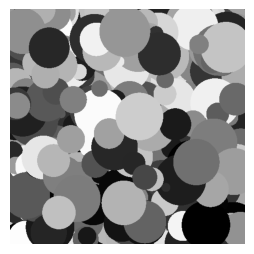

In [15]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"uniform": {"low": 100.0, "high": 10000.0}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/uniform_size.png")

### Constant

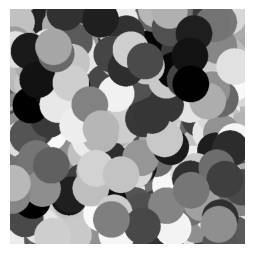

In [16]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"constant": {"value": 5000.0}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/constant_size.png")

### Normal

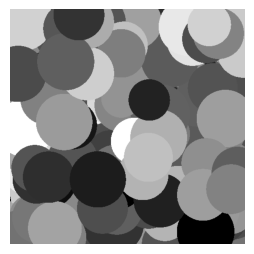

In [17]:
model = LeafGeometryGenerator(
    "circular", 
    {"area": {"normal": {"loc": 10000.0, "scale": 2000.0}}},
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"normal": {"loc": 0.5, "scale": 0.25}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))
renderer.save(image, "../docs/_static/figures/normal_size.png")

### Beta

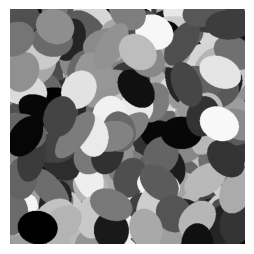

In [19]:
model = LeafGeometryGenerator(
    "ellipsoid", 
    {
        "area": {"constant": {"value": 5000.0}},
        "orientation": {"uniform": {"low": 0.0, "high": 2*torch.pi}},
        "aspect_ratio": {"beta": {"concentration0": 5, "concentration1": 13}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table,segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### Poisson

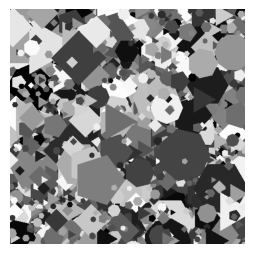

In [20]:
model = LeafGeometryGenerator(
    "polygon", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}},
        "n_vertices": {"poisson": {"rate": 5}},
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### Powerlaw

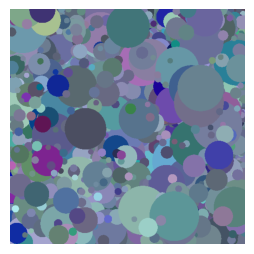

In [21]:
model = LeafGeometryGenerator(
    "circular", 
    {
        "area": {"powerlaw": {"low": 100.0, "high": 10000.0, "k": 1.5}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(
    {
        "H": {"normal": {"loc": 0.6, "scale": 0.1}},
        "S": {"powerlaw": {"low": 0.2, "high": 1.0, "k": 3}},
        "V": {"normal": {"loc": 0.6, "scale": 0.1}}
        }
)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### Cosine

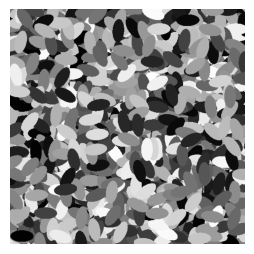

In [22]:
model = LeafGeometryGenerator(
    "ellipsoid", 
    {
        "area": {"constant": {"value": 1000.0}},
        "orientation": {"cosine": {"amplitude": 0.5, "frequency": 4}},
        "aspect_ratio": {"constant": {"value": 0.5}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### ExpCosine

/home/swantje/dead_leaves/.venv/lib/python3.12/site-packages/torchquad/integration/utils.py:262: UserWarning: DEPRECATION WARNING: In future versions of torchquad, an array-like object will be returned.
  warnings.warn(


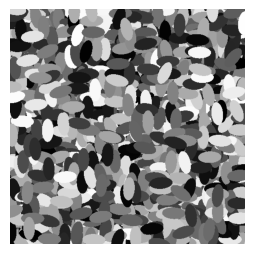

In [23]:
model = LeafGeometryGenerator(
    "ellipsoid", 
    {
        "area": {"constant": {"value": 1000.0}},
        "orientation": {"expcosine": {"frequency": 4, "exponential_constant": 3}},
        "aspect_ratio": {"constant": {"value": 0.5}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({"gray": {"uniform": {"low": 0.0, "high": 1.0}}})

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

### Image

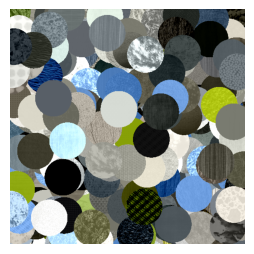

In [24]:
model = LeafGeometryGenerator(
    "circular", 
    {
        "area": {"constant": {"value": 5000.0}}
        },
    (512,512)
)
leaf_table, segmentation_map = model.generate_segmentation()

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color({
        "source": {"image": {"dir": "./images"}}
    })
colormodel.sample_texture({
        "source": {"image": {"dir": "./textures/brodatz"}},
        "alpha": {"normal": {"loc": 0.0, "scale": 0.4}},
    })

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image, figsize = (3,3))

## Leaf Table Manipulations

### Motion

In [25]:
image_shape = (512, 512)
area = image_shape[0] * image_shape[1]

geometry = LeafGeometryGenerator(
    leaf_shape="circular",
    shape_param_distributions={
        "area": {"uniform": {"low": area * 0.005, "high": area * 0.01}},
    },
    image_shape=image_shape,
    n_sample=250,
    position_mask={
        "shape": "circular",
        "params": {
            "area": area * 0.35,
        },
    },
)

leaf_table, segmentation_map = geometry.generate_segmentation()

color_params = {
    "H": {"uniform": {"low": 0.0, "high": 0.2}},
    "S": {"uniform": {"low": 0.0, "high": 1.0}},
    "V": {"uniform": {"low": 0.0, "high": 1.0}},
}

appearance = LeafAppearanceSampler(
    leaf_table=leaf_table,
)

table = appearance.sample_color(color_param_distributions=color_params)

def apply_circular_motion(
    leaf_table: pd.DataFrame,
    image_size: tuple[int, int] | torch.Size,
    angle_step: float,
    angular_jitter: float = 0.0,
    radial_jitter: float = 0.0,
) -> pd.DataFrame:

    table = leaf_table.copy()

    cy = image_size[0] / 2
    cx = image_size[1] / 2

    # convert to numpy for vectorized math
    x = torch.tensor(table["x_pos"]) - cx
    y = torch.tensor(table["y_pos"]) - cy

    r = torch.sqrt(x**2 + y**2)
    theta = torch.arctan2(y, x)

    # update angle
    theta += angle_step
    if angular_jitter > 0:
        theta += torch.distributions.normal.Normal(0.0, angular_jitter).sample((len(theta),))

    # update radius
    if radial_jitter > 0:
        r += torch.distributions.normal.Normal(0.0, radial_jitter).sample((len(r),))
        r = torch.clip(r, 0.0, None)

    # back to Cartesian
    table["x_pos"] = cx + r * torch.cos(theta)
    table["y_pos"] = cy + r * torch.sin(theta)

    return table


frames = []
for t in range(20):
    table = apply_circular_motion(
        leaf_table=table,
        image_size=segmentation_map.shape,
        angle_step=torch.pi / 10,
        angular_jitter=0.1,
    )

    renderer = ImageRenderer(
        leaf_table=table,
        image_shape=image_shape,
        background_color=torch.tensor(1.0),
    )
    image = renderer.render_image()
    frames.append(image.cpu())


# Generate gif
fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(frames[0])
ax.axis("off")
ax.set_position((0.0, 0.0, 1.0, 1.0))


def update(i):
    im.set_data(frames[i])
    return [im]


ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(frames),
    interval=100,
    blit=True,
)

plt.close(fig)
HTML(ani.to_jshtml())
#ani.save("../docs/_static/figures/circular_motion.gif")

### Merge tables

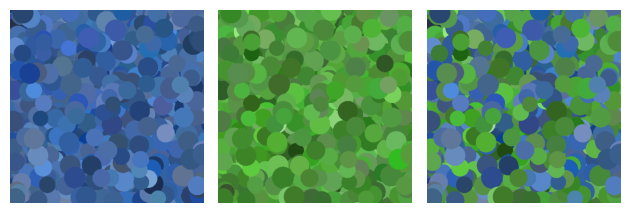

In [26]:
image_shape = (512, 512)
area = image_shape[0] * image_shape[1]

geometry = LeafGeometryGenerator(
    leaf_shape="circular",
    shape_param_distributions={
        "area": {"uniform": {"low": area * 0.005, "high": area * 0.01}},
    },
    image_shape=image_shape,
)

leaf_table, segmentation_map = geometry.generate_segmentation()

color_params_green = {
    "H": {"normal": {"loc": 0.3, "scale": 0.01}},
    "S": {"normal": {"loc": 0.6, "scale": 0.1}},
    "V": {"normal": {"loc": 0.6, "scale": 0.1}},
}

color_params_blue = {
    "H": {"normal": {"loc": 0.6, "scale": 0.01}},
    "S": {"normal": {"loc": 0.6, "scale": 0.1}},
    "V": {"normal": {"loc": 0.6, "scale": 0.1}},
}

colormodel_green = LeafAppearanceSampler(leaf_table)
colormodel_green.sample_color(color_params_green)

colormodel_blue = LeafAppearanceSampler(leaf_table)
colormodel_blue.sample_color(color_params_blue)

merged_leaf_table = colormodel_blue.leaf_table.copy()
merged_leaf_table.iloc[1::2] = colormodel_green.leaf_table.iloc[1::2]

renderer_blue = ImageRenderer(colormodel_blue.leaf_table, segmentation_map)
renderer_green = ImageRenderer(colormodel_green.leaf_table, segmentation_map)
renderer_merged = ImageRenderer(merged_leaf_table, segmentation_map)
renderer_blue.render_image()
renderer_green.render_image()
renderer_merged.render_image()

fig,ax = plt.subplots(1,3, facecolor='none', frameon=False)
ax[0].imshow(renderer_blue.image.cpu(), vmax=1, vmin=0)
ax[1].imshow(renderer_green.image.cpu(), vmax=1, vmin=0)
ax[2].imshow(renderer_merged.image.cpu(), vmax=1, vmin=0)

for a in ax:
    a.axis('off')
    
fig.patch.set_facecolor(None)
fig.tight_layout()
plt.show()

### Shuffle leaves

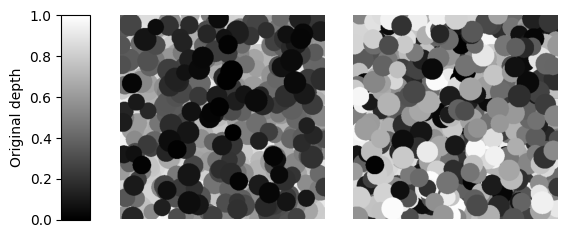

In [27]:
image_shape = (512, 512)
area = image_shape[0] * image_shape[1]

geometry = LeafGeometryGenerator(
    leaf_shape="circular",
    shape_param_distributions={
        "area": {"uniform": {"low": area * 0.005, "high": area * 0.01}},
    },
    image_shape=image_shape,
)

leaf_table, segmentation_map = geometry.generate_segmentation()

n_leaves = len(leaf_table)

color_params = {
    "gray": {"constant": {"value": {"from": "leaf_idx", "fn": lambda x: x/n_leaves}}},
}


colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(color_params)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
renderer.render_image()

randomized_table = LeafTopology.randomize_index(colormodel.leaf_table)
renderer_randomized = ImageRenderer(randomized_table, image_shape=image_shape)
renderer_randomized.render_image()

fig,ax = plt.subplots(1,3, facecolor='none', frameon=False, gridspec_kw={'width_ratios': [1, 7, 7]})
tmp = ax[1].imshow(renderer.image.cpu(), cmap='binary_r', vmax=1, vmin=0)
ax[2].imshow(renderer_randomized.image.cpu(), vmax=1, vmin=0)

for a in ax[1:3]:
     a.axis('off')
    
pos_img = ax[1].get_position()
new_pos = [ax[0].get_position().x0, pos_img.y0, ax[0].get_position().width, pos_img.height]
ax[0].set_position(new_pos)
plt.colorbar(tmp, cax=ax[0])
ax[0].set_ylabel('Original depth')
ax[0].yaxis.set_ticks_position('left')
ax[0].yaxis.set_label_position('left')
fig.patch.set_facecolor(None)
plt.show()

### Shuffle and sort leaves by group

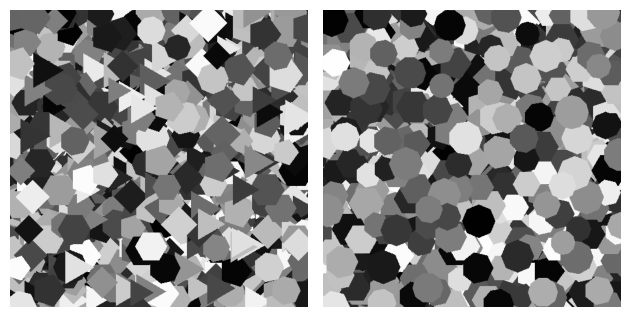

In [28]:
image_shape = (512, 512)
area = image_shape[0] * image_shape[1]

geometry = LeafGeometryGenerator(
    leaf_shape="polygon",
    shape_param_distributions={
        "area": {"uniform": {"low": area * 0.005, "high": area * 0.01}},
        "n_vertices": {"poisson": {"rate": 5}}
    },
    image_shape=image_shape,
)

leaf_table, segmentation_map = geometry.generate_segmentation()

color_params = {
    "gray": {"uniform": {"low": 0.0, "high": 1.0}},
}


colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(color_params)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
renderer.render_image()

leaf_table_by_shape = LeafTopology.reindex_by_group(colormodel.leaf_table, groupby="n_vertices", shuffle=True, group_order="descending")
renderer_sorted = ImageRenderer(leaf_table_by_shape, image_shape=image_shape)
renderer_sorted.render_image()

fig,ax = plt.subplots(1,2, facecolor='none', frameon=False)
ax[0].imshow(renderer.image.cpu(), vmax=1, vmin=0)
ax[1].imshow(renderer_sorted.image.cpu(), vmax=1, vmin=0)

for a in ax:
      a.axis('off')
    
fig.patch.set_facecolor(None)
fig.tight_layout()
plt.show()

### Proto-object in motion

In [29]:
image_shape = (512, 512)
area = image_shape[0] * image_shape[1]

shared_params = {
    "leaf_shape": "circular",
    "shape_param_distributions": {
        "area": {"uniform": {"low": area * 0.005, "high": area * 0.01}}
    },
    "image_shape": image_shape,
}

table_background, _ = LeafGeometryGenerator(
    **shared_params,
    n_sample=200,
).generate_segmentation()

table_target, _ = LeafGeometryGenerator(
    **shared_params,
    n_sample=10,
    position_mask={"shape": "circular", "params": {"area": area * 0.05}},
).generate_segmentation()

table_background = LeafAppearanceSampler(leaf_table=table_background).sample_color(
    color_param_distributions={"gray": {"normal": {"loc": 0.5, "scale": 0.2}}},
)

table_target = LeafAppearanceSampler(leaf_table=table_target).sample_color(
    color_param_distributions={
        "R": {"uniform": {"low": 0.2, "high": 1.0}},
        "G": {"constant": {"value": 0.0}},
        "B": {"constant": {"value": 0.0}},
    },
)

table_background["type"] = "background"
table_target["type"] = "target"

topology = LeafTopology(image_shape=image_shape)

table_merged = topology.merge_leaf_tables(table_background, table_target)
table_merged = LeafTopology.randomize_index(table_merged, seed=42)


def move_leaves_one_step(
    leaf_table: pd.DataFrame,
    frame_idx: int,
    image_shape: tuple[int, int],
    radius: float = 5.0,
    target_velocity: tuple[float, float] = (1.0, 0.0),
    bg_angles: torch.Tensor | None = None,
    bg_angular_velocities: torch.Tensor | None = None,
) -> pd.DataFrame:
    table = leaf_table.copy()

    # Identify background and target leaves
    bg_mask = table["type"] != "target"
    target_mask = table["type"] == "target"

    n_bg = bg_mask.sum()
    bg_indices = table.index[bg_mask]

    # Initialize angles and angular velocities if not provided
    if bg_angles is None:
        bg_angles = torch.distributions.uniform.Uniform(0, 2 * torch.pi).sample((n_bg,))
    if bg_angular_velocities is None:
        bg_angular_velocities = torch.distributions.uniform.Uniform(0.02, 0.05).sample((n_bg,))

    # Move background leaves
    for i, idx in enumerate(bg_indices):
        angle = bg_angles[i] + frame_idx * bg_angular_velocities[i]
        dx = radius * torch.cos(angle)
        dy = radius * torch.sin(angle)
        table.loc[idx, "x_pos"] = table.loc[idx, "x_pos"] + dx
        table.loc[idx, "y_pos"] = table.loc[idx, "y_pos"] + dy

    # Move target leaves linearly
    table.loc[target_mask, "x_pos"] = (
        leaf_table.loc[target_mask, "x_pos"] + frame_idx * target_velocity[0]
    ) % image_shape[1]
    table.loc[target_mask, "y_pos"] = (
        leaf_table.loc[target_mask, "y_pos"] + frame_idx * target_velocity[1]
    ) % image_shape[0]
    return table


frames = []
n_frames = 80
for t in range(n_frames):
    table = move_leaves_one_step(
        leaf_table=table_merged,
        image_shape=image_shape,
        frame_idx=t,
        radius=5.0,
        target_velocity=(image_shape[1] / n_frames, 0.0),
    )

    renderer = ImageRenderer(
        leaf_table=table,
        image_shape=image_shape,
        background_color=torch.tensor(1.0),
    )
    image = renderer.render_image()
    frames.append(image.cpu())

fig, ax = plt.subplots(figsize=(5.12, 5.12))
im = ax.imshow(frames[0])
ax.axis("off")
ax.set_position((0.0, 0.0, 1.0, 1.0))


def update(i):
    im.set_data(frames[i])
    return [im]


ani = animation.FuncAnimation(
    fig,
    update,
    frames=n_frames,
    interval=100,
    blit=True,
)

plt.close(fig)
HTML(ani.to_jshtml())
#ani.save("../docs/_static/figures/protoobject.gif")

## Logo

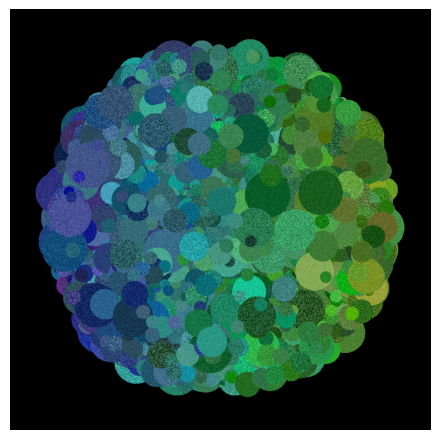

In [ ]:
model = LeafGeometryGenerator(
    "circular",
    {"area": {"powerlaw": {"low": 500.0, "high": 10000.0, "k": 1.5}}},
    (1000,1000),
    {
        "shape": "circular",
        "params": {'x_pos': 500, 'y_pos': 500,  'area': torch.tensor([500000])}
        }
)

leaf_table, segmentation_map = model.generate_segmentation()

color_params = {
    'H': {'normal': {
        'loc': {'from': 'x_pos', 'fn': lambda x: 0.001*x * 0.2 + (1-0.001*x) * 0.7}, 
        'scale': 0.05
        }},
    'S': {'powerlaw': {'low': 0.5, 'high': 1.0, "k": 3}},
    'V': {'normal': {'loc': 0.5, 'scale': 0.1}}
}

texture_params = {
    'gray': {'normal': {'loc': 0.0, 'scale': {'powerlaw': {'low': 0.05, 'high': 0.2, 'k': 3}}}},
}

colormodel = LeafAppearanceSampler(leaf_table)
colormodel.sample_color(color_params)
colormodel.sample_texture(texture_params)

renderer = ImageRenderer(colormodel.leaf_table, segmentation_map)
image = renderer.render_image()
renderer.show(image)
renderer.save(image, '../docs/_static/logo_dead_leaves.png')